In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = r'C:\Users\rashm\OneDrive\Documents\Numpy Ninja\Python Hackathon\OrganDonor_Consolidated.xlsx'
df = pd.ExcelFile(file_path)

In [25]:
# Load the excelsheet
donor_details = df.parse('DonorDetails')
outcomes = df.parse('Outcomes')
referral_details = df.parse('ReferralDetails')
hosp_details = df.parse('OPO_HospDetails')
yearly_outcomes = df.parse('Yearly_Outcomes')

#### Q59. What % of the dataset is male vs female?

In [97]:
gender_count = donor_details['gender'].value_counts()

# Calculate % of male and female
gender_percentages = gender_count / len(donor_details) *100

print(gender_percentages)

gender
M    58.805719
F    41.148451
Name: count, dtype: float64


#### Q60. How many patients of each race are listed under an Unknown cause of death?

In [ ]:
# Filter the dataset for patients with an "Unknown" cause of death
unknown_cause = donor_details[donor_details['causeofdeath'] == 'Unknown']

race_counts = unknown_cause['race'].value_counts()

print(race_counts)

race
White       15994
Black        4970
Hispanic     4181
Other        1635
Name: count, dtype: int64


#### Q65. List any 10 donors that are not there in the outcomes sheet.

In [102]:
# Extract donor IDs from both sheets
donor_ids = set(donor_details['PatientID'])
outcome_ids = set(outcomes['PatientID'])

# Find donors in DonorDetails but not in Outcomes
missing_donors = list(donor_ids - outcome_ids)

# Display any 10 missing donors
print(missing_donors[:10])

['OPO1_P375589', 'OPO2_P244564', 'OPO6_P123424', 'OPO4_P613330', 'OPO2_P953058', 'OPO2_P46428', 'OPO4_P758430', 'OPO6_P841985', 'OPO1_P760715', 'OPO5_P858006']


#### Q 71. Which year recorded the highest number of organ procurements from patients who died due to stroke as the mechanism of death? Display this information using a bar chart.

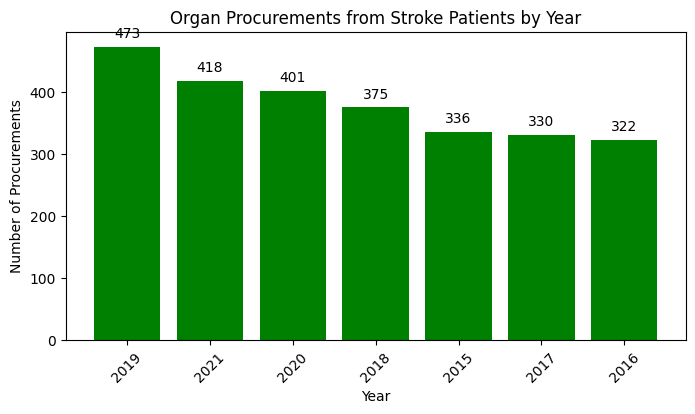

In [75]:

# Lets start with merging data: outcomes and patient_details and referral_details
merged_data_1 = pd.merge(donor_details, outcomes, on='PatientID', how='inner')

merged_data = pd.merge(merged_data_1, referral_details, on='PatientID', how='inner')

# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by 'Referral_Year' and count the number of rows (referrals) for each year
stroke_procurements = stroke_data.groupby('Referral_Year').size().reset_index(name='PatientCount')

stroke_procurements = stroke_procurements.sort_values(by='PatientCount', ascending=False)

# Display the year with the highest number of procurements
highest_year = stroke_procurements.iloc[0]

# Plot the results using a bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(stroke_procurements['Referral_Year'].astype(str), stroke_procurements['PatientCount'], color='green')
# Add annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10,
             str(yval), ha='center', va='bottom', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Number of Procurements')
plt.title('Organ Procurements from Stroke Patients by Year')
plt.xticks(rotation=45)
plt.show()

#### Q.72 Which organ has the highest chance of being successfully transplanted

In [96]:
import pandas as pd

# Create a function to calculate transplant success rate for each organ
def calculate_success_rate(column_name):
    # Count the number of 'Transplanted' entries
    success_count = outcomes[column_name].apply(lambda x: x == 'Transplanted').sum()
    total_count = outcomes[column_name].notna().sum()
    success_rate = success_count / total_count * 100 if total_count > 0 else 0
    return success_rate

# Calculate success rate for each organ
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 'outcome_lung_left']
success_rates = {organ: calculate_success_rate(organ) for organ in organ_columns}

# Find the organ with the highest transplant success rate
highest_rate_organ = max(success_rates, key=success_rates.get)
highest_rate_value = success_rates[highest_rate_organ]

print(f"The organ with the highest transplant success rate is: {highest_rate_organ} with a success rate of {highest_rate_value:.2f}%")


The organ with the highest transplant success rate is: outcome_liver with a success rate of 88.76%


#### Q.77 Using loops, create a multiplication table for the number 8

In [90]:
# Multiplication table for the number 8
number = 8

# Loop through numbers 1 to 10
for i in range(1, 11):
    result = number * i
    print(f"{number} x {i} = {result}")

8 x 1 = 8
8 x 2 = 16
8 x 3 = 24
8 x 4 = 32
8 x 5 = 40
8 x 6 = 48
8 x 7 = 56
8 x 8 = 64
8 x 9 = 72
8 x 10 = 80


#### Q.78 Display random data by splitting it into 4 quartiles and labeling the quartiles.

In [ ]:
# Generate random data
np.random.seed(0)
data = np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate quartiles
df['Quartile'] = pd.qcut(df['Value'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the data with quartile labels
print(df)


       Value Quartile
0   1.764052       Q4
1   0.400157       Q3
2   0.978738       Q4
3   2.240893       Q4
4   1.867558       Q4
..       ...      ...
95  0.706573       Q3
96  0.010500       Q2
97  1.785870       Q4
98  0.126912       Q3
99  0.401989       Q3

[100 rows x 2 columns]


#### Q.79 Display all details of the oldest female patient.

In [ ]:
# Filter the data to include only female patients
female_patients = donor_details[donor_details['gender'] == 'F']

# Find the oldest female patient
oldest_female_patient = female_patients.loc[female_patients['age'].idxmax()]

# Details of the oldest female patient
print(oldest_female_patient)


PatientID                     OPO1_P26983
age                                 100.0
gender                                  F
race                                Black
causeofdeath                      Unknown
mechanism_of_death                Unknown
brain_death                             0
time_asystole         2037-01-09 15:00:00
time_brain_death                      NaT
cardiac_arrest                      Other
Name: 290, dtype: object


#### Additional analysis on the dataset:

C:\Users\rashm\AppData\Local\Temp\ipykernel_26128\677690567.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return merged_data.groupby(column)[outcome_cols].apply(


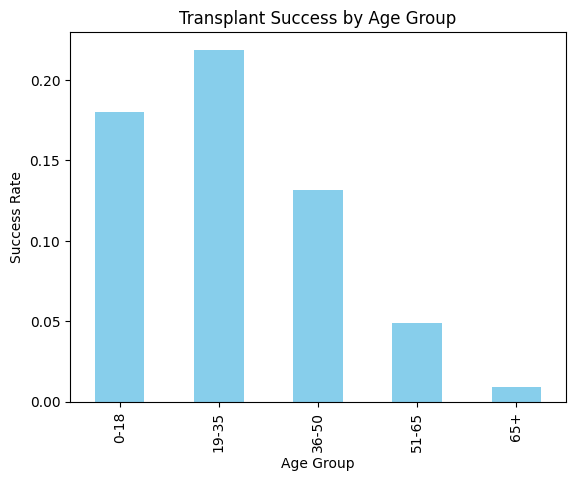

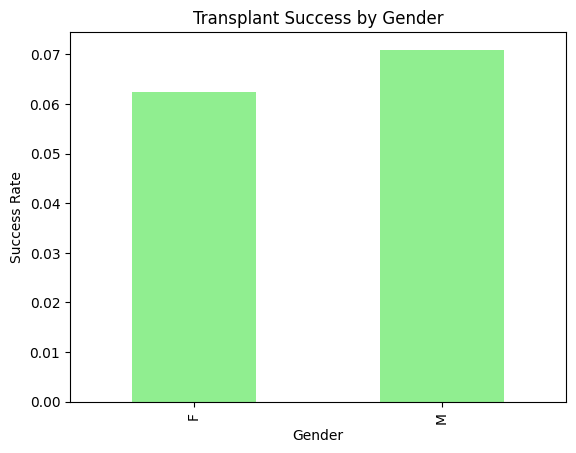

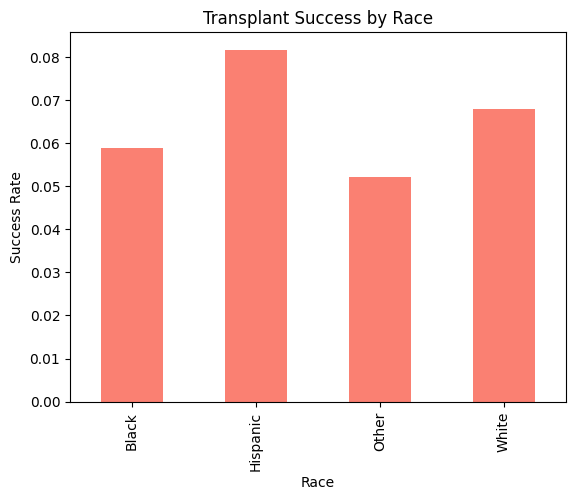

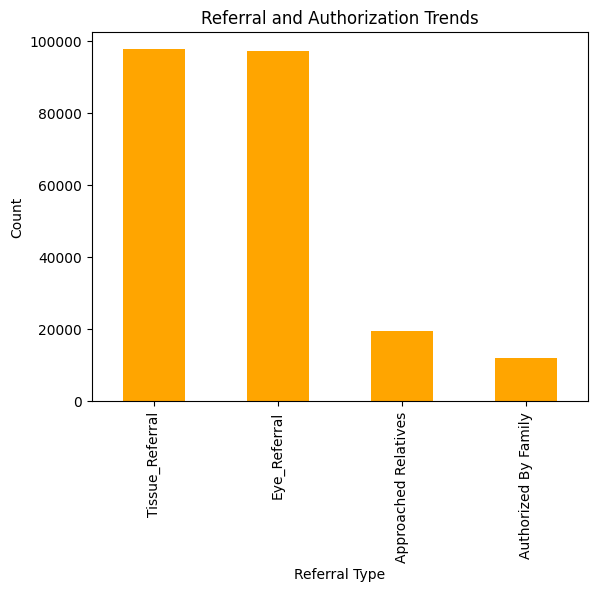

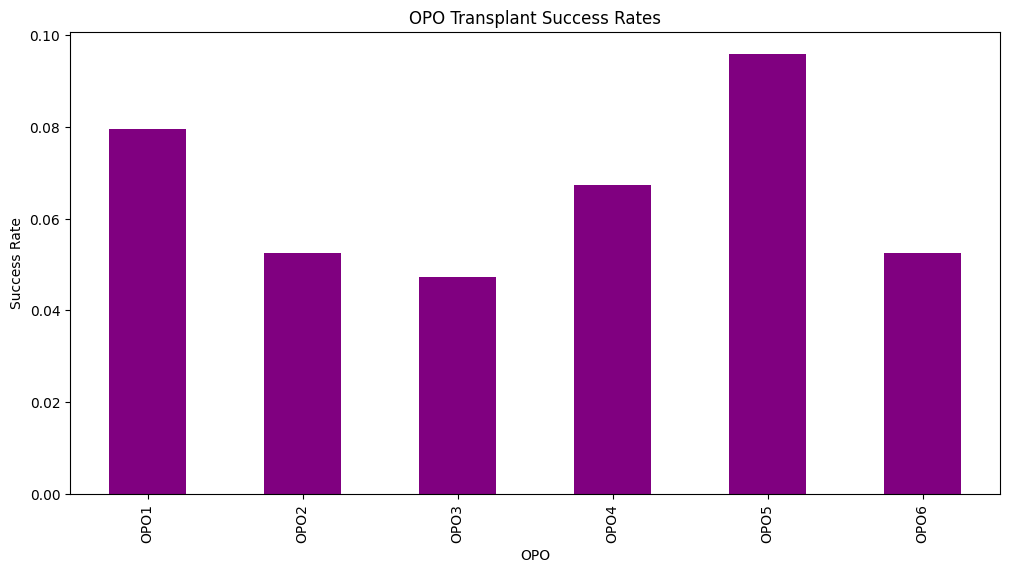

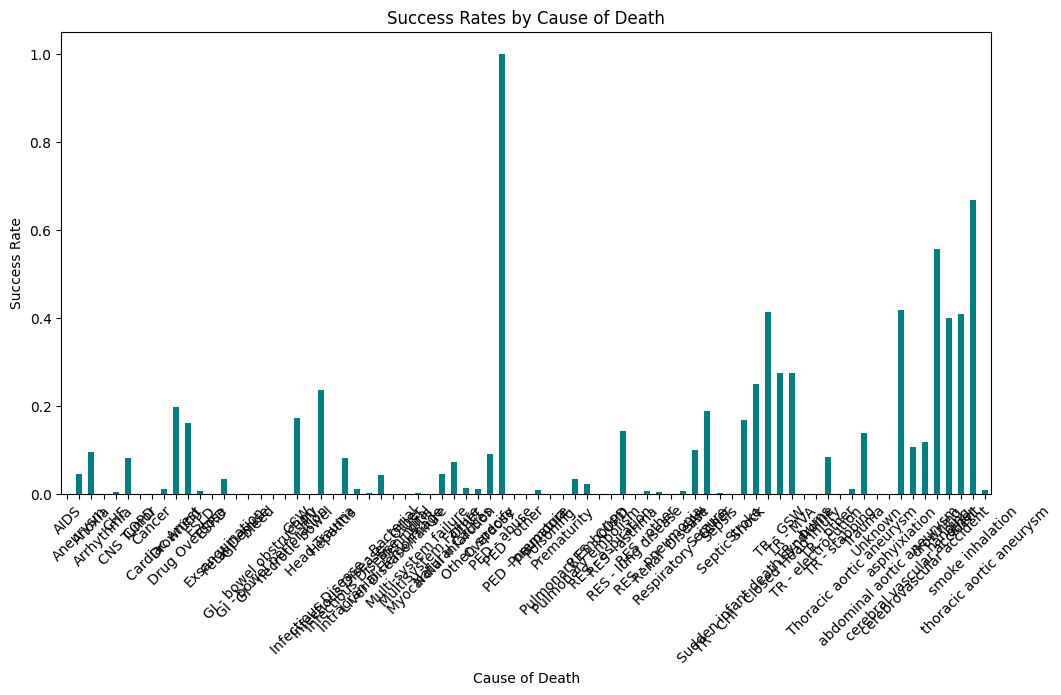

In [118]:
 # Create dataset for analysis
merged_data = pd.merge(donor_details, referral_details, on='PatientID', how='outer')
merged_data = pd.merge(merged_data, outcomes, on='PatientID', how='outer')
merged_data = pd.merge(merged_data, hosp_details, on='PatientID', how='outer')

# Lambda function to calculate success rates
def calculate_success_rate(column, outcome_cols):
    return merged_data.groupby(column)[outcome_cols].apply(
        lambda df: (df == 'Transplanted').any(axis=1).mean()
    )

# 1: Analyze Demographics
def analyze_demographics():
    outcome_cols = [col for col in merged_data.columns if col.startswith("outcome_")]
    
    # Calculate success rates for demographics
    success_by_age = calculate_success_rate(
        pd.cut(merged_data['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+']),
        outcome_cols
    )
    success_by_gender = calculate_success_rate('gender', outcome_cols)
    success_by_race = calculate_success_rate('race', outcome_cols)
    
    # Visualize
    success_by_age.plot(kind='bar', title='Transplant Success by Age Group', color='skyblue')
    plt.xlabel('Age Group')
    plt.ylabel('Success Rate')
    plt.show()
    
    success_by_gender.plot(kind='bar', title='Transplant Success by Gender', color='lightgreen')
    plt.xlabel('Gender')
    plt.ylabel('Success Rate')
    plt.show()
    
    success_by_race.plot(kind='bar', title='Transplant Success by Race', color='salmon')
    plt.xlabel('Race')
    plt.ylabel('Success Rate')
    plt.show()
    
    return success_by_age, success_by_gender, success_by_race

# 2: Analyze Referral Trends
def analyze_referrals():
    referral_stats = merged_data[['Tissue_Referral', 'Eye_Referral', 'Approached Relatives', 'Authorized By Family']].sum()
    referral_stats.plot(kind='bar', title='Referral and Authorization Trends', color='orange')
    plt.xlabel('Referral Type')
    plt.ylabel('Count')
    plt.show()
    return referral_stats

# 3: Analyze OPO Performance
def analyze_opo_performance():
    outcome_cols = [col for col in merged_data.columns if col.startswith("outcome_")]
    opo_success_rate = calculate_success_rate('OPO', outcome_cols)
    
    # Visualize
    opo_success_rate.plot(kind='bar', title='OPO Transplant Success Rates', color='purple', figsize=(12, 6))
    plt.xlabel('OPO')
    plt.ylabel('Success Rate')
    plt.show()
    
    return opo_success_rate

# 4: Analyze Cause of Death
def analyze_cause_of_death():
    outcome_cols = [col for col in merged_data.columns if col.startswith("outcome_")]
    cause_success_rate = calculate_success_rate('causeofdeath', outcome_cols)
    
    # Visualize
    cause_success_rate.plot(kind='bar', title='Success Rates by Cause of Death', color='teal', figsize=(12, 6))
    plt.xlabel('Cause of Death')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)
    plt.show()
    
    return cause_success_rate

# 5: Run All Analyses
def run_all_analyses():
    demographics_insights = analyze_demographics()
    referral_insights = analyze_referrals()
    opo_insights = analyze_opo_performance()
    cause_of_death_insights = analyze_cause_of_death()
    
    return {
        "Demographics": demographics_insights,
        "Referrals": referral_insights,
        "OPO Performance": opo_insights,
        "Cause of Death": cause_of_death_insights
    }

# Execute and extract insights
insights = run_all_analyses()